# GANs Image Generation

In this notebook, we will explore how Generative Adversarial Networks (GANs) generate images. We will use a pretrained GAN model (BigGAN) to generate images from random noise.

## Instructions
1. Run the code below to generate an image from random noise.
2. Modify the latent vector to generate different images.
3. Experiment with generating different images by altering the latent vector and visualizing the results.


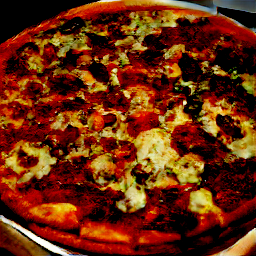

In [16]:
import torch
from pytorch_pretrained_biggan import BigGAN, one_hot_from_int, truncated_noise_sample
from torchvision.utils import save_image
import numpy as np

# Load BigGAN
model = BigGAN.from_pretrained('biggan-deep-256')
model.eval()

# Choose a class (e.g., 963 = pizza)
class_vector = one_hot_from_int([963], batch_size=1)
class_vector = torch.from_numpy(class_vector).float()

# Generate random noise
noise_vector = truncated_noise_sample(truncation=0.4, batch_size=1)
noise_vector = torch.from_numpy(noise_vector).float()

# Generate image
with torch.no_grad():
    output = model(noise_vector, class_vector, 0.4)

# Save image
save_image(output, 'pizza_output.png')
from PIL import Image
from IPython.display import display

#open and show the image
img = Image.open('pizza_output.png')
display(img)

In [15]:
# Experiment with different latent vectors
# Try a different random latent vector
latent_vector = torch.randn(1, 128)  # BigGAN uses latent vectors of size 128
latent_vector[0][0]= 2.5
class_vector = one_hot_from_int([340], batch_size=1)
class_vector = torch.from_numpy(class_vector).float()

with torch.no_grad():
    output = model(latent_vector, class_vector, 0.4)

save_image(output, 'zebra_new.png')

# Show image
from PIL import Image
from IPython.display import display
img = Image.open('zebra_new.png')




## Reflection

Now that you have generated images, write a brief report reflecting on your observations:

1. How did the generated images change when you modified the latent vector?
2. What patterns did you notice in the generated images? Were they realistic?
3. How does the process of generating images from noise differ from traditional image generation methods?
4. What challenges or limitations did you observe with the GAN model?